Let's begin by a simple 1D case.

If $y = wx$ with $w=2$. We have:

In [14]:
import torch
import torch.nn as nn
import numpy as np


x = torch.tensor([1, 2, 3, 4], dtype=torch.float32)  #Input
y = torch.tensor([2, 4, 6, 8], dtype=torch.float32)  #Output théorique

W = torch.rand(1, dtype=torch.float32, requires_grad=True)

class MyModel(nn.Module):

    def __init__(self, W):
        super(MyModel, self).__init__()
        self.W = nn.Parameter(W, requires_grad=True)
    
    def forward(self, x):
        return self.W * x

model = MyModel(W=W)

learning_rate = 0.01
n_iters = 400

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

for epoch in range(n_iters):
    # Prediction
    y_pred = model(x)

    # loss
    l = loss(y_pred, y)

    # backward pass
    l.backward()

    #update weights
    optimizer.step()
    optimizer.zero_grad()

    print(f"epoch {epoch}/{n_iters} loss {l} W = {(W[0]):.3f}")

epoch 0/400 loss 8.360563278198242 W = 1.103
epoch 1/400 loss 6.040506362915039 W = 1.237
epoch 2/400 loss 4.364266395568848 W = 1.352
epoch 3/400 loss 3.1531827449798584 W = 1.449
epoch 4/400 loss 2.2781741619110107 W = 1.532
epoch 5/400 loss 1.6459808349609375 W = 1.602
epoch 6/400 loss 1.189220905303955 W = 1.662
epoch 7/400 loss 0.8592120409011841 W = 1.712
epoch 8/400 loss 0.6207807064056396 W = 1.755
epoch 9/400 loss 0.44851434230804443 W = 1.792
epoch 10/400 loss 0.3240514397621155 W = 1.823
epoch 11/400 loss 0.23412704467773438 W = 1.850
epoch 12/400 loss 0.16915678977966309 W = 1.872
epoch 13/400 loss 0.12221580743789673 W = 1.891
epoch 14/400 loss 0.08830098062753677 W = 1.908
epoch 15/400 loss 0.06379739940166473 W = 1.922
epoch 16/400 loss 0.04609359800815582 W = 1.933
epoch 17/400 loss 0.03330262750387192 W = 1.943
epoch 18/400 loss 0.024061203002929688 W = 1.952
epoch 19/400 loss 0.017384272068738937 W = 1.959
epoch 20/400 loss 0.012560101225972176 W = 1.965
epoch 21/400 

We converge to the correct value. Wonderful! Let's complexify our previous equation by using matrix. We now have :

$\mathbf{y} = \mathbf{W} * \vec{x}$ with $\mathbf{W} = [[1, 2],[3, 4]]$

$\vec{x}$ is therefore a 2x1 matrix

In [84]:
import torch
import torch.nn as nn
import numpy as np

x = torch.tensor([[[1],[1]], [[2],[2]], [[3],[3]], [[4],[4]]], dtype=torch.float32)

W_true = torch.tensor([[1, 2], [3, 4]])

W = (torch.randn(2, 2, dtype=torch.float32, requires_grad=True))
W = nn.Parameter(W)

y = W_true * x

class MyModel(nn.Module):

    def __init__(self, W):
        super(MyModel, self).__init__()
        self.W = W
    
    def forward(self, x):
        return self.W * x


learning_rate = 0.01

model = MyModel(W=W)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss = nn.MSELoss()

for name, param in model.named_parameters():  # To see params
    if param.requires_grad:
        print (name, param.data)

n_iters = 500

for epoch in range(n_iters):
    #Forward pass
    y_pred = model(x)

    #loss
    l = loss(y_pred, y)

    #Gradient
    l.backward()

    #update weights
    optimizer.step()
    optimizer.zero_grad()

    print(f"epoch {epoch}/{n_iters} loss {l}")

print(W)

W tensor([[ 0.7389, -0.3510],
        [-0.8049,  0.4715]])
epoch 0/500 loss 60.98081588745117
epoch 1/500 loss 56.493003845214844
epoch 2/500 loss 52.335472106933594
epoch 3/500 loss 48.483909606933594
epoch 4/500 loss 44.91579818725586
epoch 5/500 loss 41.61027526855469
epoch 6/500 loss 38.54801559448242
epoch 7/500 loss 35.711124420166016
epoch 8/500 loss 33.083011627197266
epoch 9/500 loss 30.648305892944336
epoch 10/500 loss 28.392784118652344
epoch 11/500 loss 26.303253173828125
epoch 12/500 loss 24.367496490478516
epoch 13/500 loss 22.574201583862305
epoch 14/500 loss 20.912879943847656
epoch 15/500 loss 19.373823165893555
epoch 16/500 loss 17.94803237915039
epoch 17/500 loss 16.62717056274414
epoch 18/500 loss 15.403512954711914
epoch 19/500 loss 14.269912719726562
epoch 20/500 loss 13.219734191894531
epoch 21/500 loss 12.246845245361328
epoch 22/500 loss 11.34555435180664
epoch 23/500 loss 10.51059341430664
epoch 24/500 loss 9.737080574035645
epoch 25/500 loss 9.020492553710938

Our matrix converge to the correct value! Let's now complexify our model by using a common matrix multiplication

$\vec{y} = \mathbf{W}\vec{x}$

Let's begin by generating our fake data:

In [3]:
x1 = np.linspace(0, 5, 10)
x2 = np.linspace(2, 8, 10)

X = np.array([x1, x2]).T

W_true = np.array([[1, 2], [3, 4]])

y = np.zeros((X.shape[0], X.shape[1]))

for i in range(X.shape[0]):
    y[i] = W_true @ X[i]


In [21]:
import torch
import torch.nn as nn
import numpy as np

#Set Up
x = torch.tensor(X, dtype=torch.float32)


W_true = torch.tensor(W_true, dtype=torch.float32)

W = (torch.randn(2, 2, dtype=torch.float32, requires_grad=True))
W = nn.Parameter(W)

y = torch.zeros(x.shape[0], x.shape[1])

for i in range(x.shape[0]):
    y[i] = torch.matmul(W_true, x[i])

W = (torch.randn(2, 2, dtype=torch.float32, requires_grad=True))
W = nn.Parameter(W)

class MyModel(nn.Module):

    def __init__(self, W):
        super(MyModel, self).__init__()
        self.W = W
    
    def forward(self, x):
        return torch.matmul(self.W, x)

learning_rate = 0.01

model = MyModel(W=W)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss = nn.MSELoss()

n_iters = 1000

for epoch in range(n_iters):
    #Forward pass
    y_pred = torch.zeros(x.shape[0], x.shape[1])
    for i in range(x.shape[0]):
        y_pred[i] = model(x[i])

    #loss
    l = loss(y, y_pred)

    #Gradient
    l.backward()

    #Update
    optimizer.step()
    optimizer.zero_grad()

    print(f"Epoch {epoch}/{n_iters} loss {l}")

#for name, param in model.named_parameters():  # To see params
#    if param.requires_grad:
#        print (name, param.data)

print(W)

C:\Users\antho\AppData\Local\Temp/ipykernel_8872/564477219.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  W_true = torch.tensor(W_true, dtype=torch.float32)


Epoch 0/1000 loss 1179.44189453125
Epoch 1/1000 loss 465.47930908203125
Epoch 2/1000 loss 183.80514526367188
Epoch 3/1000 loss 72.67784881591797
Epoch 4/1000 loss 28.83489418029785
Epoch 5/1000 loss 11.537043571472168
Epoch 6/1000 loss 4.711792469024658
Epoch 7/1000 loss 2.0182104110717773
Epoch 8/1000 loss 0.95466548204422
Epoch 9/1000 loss 0.5342071056365967
Epoch 10/1000 loss 0.36746522784233093
Epoch 11/1000 loss 0.30082470178604126
Epoch 12/1000 loss 0.2736814320087433
Epoch 13/1000 loss 0.2621247172355652
Epoch 14/1000 loss 0.2567223608493805
Epoch 15/1000 loss 0.2537519931793213
Epoch 16/1000 loss 0.251746267080307
Epoch 17/1000 loss 0.250125914812088
Epoch 18/1000 loss 0.2486613690853119
Epoch 19/1000 loss 0.24726340174674988
Epoch 20/1000 loss 0.24589622020721436
Epoch 21/1000 loss 0.24454502761363983
Epoch 22/1000 loss 0.2432052195072174
Epoch 23/1000 loss 0.2418738603591919
Epoch 24/1000 loss 0.24055016040802002
Epoch 25/1000 loss 0.23923425376415253
Epoch 26/1000 loss 0.237

We see that we converge to the correct matrix! Wonderful! Let complexify a last time our model by adding a simgoid function :

$\vec{y} = \sigma(\mathbf{W}\vec{x})$

Let's begin by creating our data:

In [27]:
x1 = np.linspace(0, 5, 20)
x2 = np.linspace(-3, 2, 20)

X = np.array([x1, x2]).T

W_true = np.array([[1, 2], [3, 4]])

y = np.zeros((X.shape[0], X.shape[1]))

sigma = lambda x: ((1+np.exp(-x))**(-1))

for i in range(X.shape[0]):
    y[i] = sigma(W_true @ X[i])


array([[2.47262316e-03, 6.14417460e-06],
       [5.42916316e-03, 3.87672979e-05],
       [1.18787699e-02, 2.44563867e-04],
       [2.57915356e-02, 1.54114975e-03],
       [5.50908438e-02, 9.64542862e-03],
       [1.13786745e-01, 5.78956558e-02],
       [2.20430757e-01, 2.79414362e-01],
       [3.83744612e-01, 7.09866722e-01],
       [5.78297773e-01, 9.39165926e-01],
       [7.51244963e-01, 9.89838617e-01],
       [8.69294680e-01, 9.98375700e-01],
       [9.36088489e-01, 9.99742223e-01],
       [9.69929659e-01, 9.99959138e-01],
       [9.86117657e-01, 9.99993524e-01],
       [9.93648115e-01, 9.99998974e-01],
       [9.97105676e-01, 9.99999837e-01],
       [9.98683655e-01, 9.99999974e-01],
       [9.99401839e-01, 9.99999996e-01],
       [9.99728296e-01, 9.99999999e-01],
       [9.99876605e-01, 1.00000000e+00]])

In [56]:
import torch 
import torch.nn as nn
import numpy as np

# Set up

x = torch.tensor(X, dtype=torch.float32)

W_true = torch.tensor(W_true, dtype=torch.float32)

W = torch.randn(2, 2, dtype=torch.float32, requires_grad=True)
#W = torch.tensor([[10, 10], [10, 10]], dtype=torch.float32, requires_grad=True)
W = nn.Parameter(W)

y = torch.tensor(y, dtype=torch.float32)

class MyModel(nn.Module):

    def __init__(self, W):
        super(MyModel, self).__init__()
        self.W = W
    
    def forward(self, x):
        return torch.sigmoid(torch.matmul(self.W, x))

learning_rate = 30

model = MyModel(W=W)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
loss = nn.MSELoss()

n_iters = 1000

Total_lost = []

for epoch in range(n_iters):
    #Forward pass
    y_pred = torch.zeros(x.shape[0], x.shape[1])
    for i in range(x.shape[0]):
        y_pred[i] = model(x[i])

    #loss
    l = loss(y, y_pred)

    #Gradient
    l.backward()

    #Update
    optimizer.step()
    optimizer.zero_grad()

    Total_lost.append(l.detach().numpy())

print(W)

C:\Users\antho\AppData\Local\Temp/ipykernel_8872/1939226080.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  W_true = torch.tensor(W_true, dtype=torch.float32)
C:\Users\antho\AppData\Local\Temp/ipykernel_8872/1939226080.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.float32)


Parameter containing:
tensor([[1.0000, 2.0000],
        [2.9997, 3.9996]], requires_grad=True)


We converge to the correct answer! Wonderful! However, we have to increase our learning rate. This is because our range of value is small (always between 0 and 1), therefore, a small difference in the loss function is actually more significative! A learning rate of 0.01 was not able to converge to the correct answer. A learning rate of 10 or 100 seems to work. We would need to refine our model to find the perfect learning rate because the loss function increase a little bit per moment.

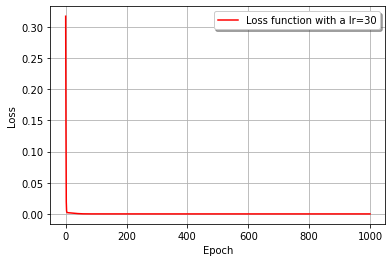

In [67]:
import matplotlib.pyplot as plt

t = np.linspace(0, n_iters, len(Total_lost))


plt.plot(t, Total_lost, "r-", label="Loss function with a lr=30")
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(shadow=True, fancybox=True)
plt.show()